In [1]:
#Load libraries

import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
import matplotlib.pyplot as plt
import tabulate
from sklearn import tree
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from skopt.space import Integer, Categorical
from skopt import BayesSearchCV

In [2]:
#Load data

data = pd.read_csv('breast-cancer 2.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Dataframe summary

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Encode the diagnosis column

label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [5]:
# Select only numeric columns

numeric_data = data.select_dtypes(include=[float, int])

In [6]:
## Data cleaning: Duplicates

initial_row_count = data.shape[0]
data = data.drop_duplicates()
final_row_count = data.shape[0]
duplicates_removed = initial_row_count - final_row_count
print(f"Number of duplicates removed: {duplicates_removed}")

Number of duplicates removed: 0


In [7]:
## Data cleaning: Missing values

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [8]:
# Data cleaning: Outliers. Identify outliers using the IQR method

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))

In [9]:
# Create a boolean mask for outliers

outlier_mask = outliers.any(axis=1)

# Remove outliers

cleaned_data = data.loc[~outlier_mask]

In [10]:
# Split the data into training and testing sets

X = cleaned_data.drop('diagnosis', axis=1)
y = cleaned_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
# Verify the split by printing dimensions

print("Training set size (X_train):", X_train.shape)
print("Training set size (y_train):", y_train.shape)
print("Testing set size (X_test):", X_test.shape)
print("Testing set size (y_test):", y_test.shape)

Training set size (X_train): (276, 31)
Training set size (y_train): (276,)
Testing set size (X_test): (70, 31)
Testing set size (y_test): (70,)


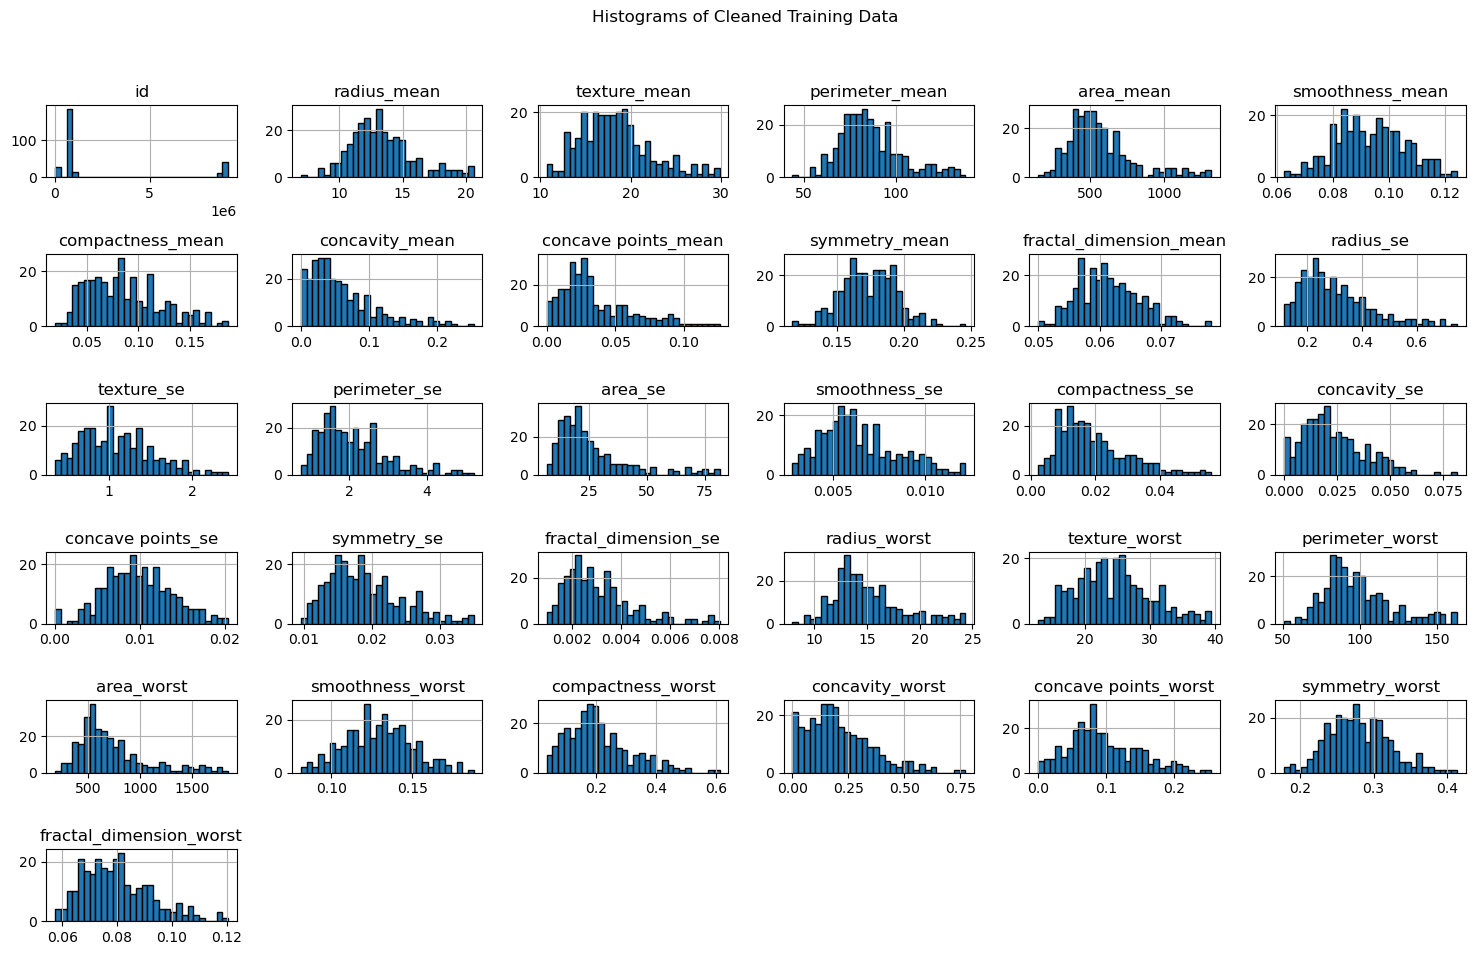

In [12]:
# Plot histograms for each numeric column in the cleaned training data

X_train.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Cleaned Training Data')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
# Initialize the Decision Tree Classifier

clf = DecisionTreeClassifier(random_state=1)

In [14]:
# Define the parameter search space

param_space = {
    'max_depth': Integer(3, 10),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical([None, 'sqrt', 'log2'])
}

In [15]:
# Initialize BayesSearchCV

bayes_search = BayesSearchCV(estimator=clf, search_spaces=param_space, n_iter=32, cv=5, scoring='accuracy', n_jobs=-1, random_state=1)

In [16]:
# Fit BayesSearchCV to the training data

bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_iter=32,
              n_jobs=-1, random_state=1, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=(None, 'sqrt', 'log2'), prior=None),
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize')})

In [17]:
# Print the best parameters and the best score

print("Best Parameters:", bayes_search.best_params_)
print("Best Score:", bayes_search.best_score_)

Best Parameters: OrderedDict([('max_depth', 3), ('max_features', None), ('min_samples_leaf', 3), ('min_samples_split', 10)])
Best Score: 0.9420779220779221


In [18]:
# Train the classifier with the best parameters

best_clf = bayes_search.best_estimator_

In [19]:
# Predict on the test data

y_pred = best_clf.predict(X_test)

In [20]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred)

In [21]:
# Print evaluation metrics

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")

Model Evaluation:
Accuracy: 0.89
Precision: 0.82


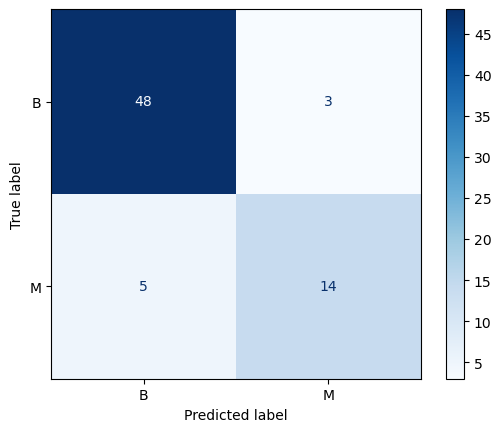

In [22]:
# Display the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()